# Solutions to Exercises

Here are some simple solutions to the exercises that are given in the notebook. I hope you have come up with the same results! First we'll do some imports that we'll need later on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

Let us first define the parameters and the last subroutine again and make it such that it can take `nint` as a parameter.

In [2]:
# Measurements:
nt = 50.
n0 = 100.
tmsr = 180.
sigma_nt = 5.
sigma_n0 = 10.
sigma_t = 1.

In [3]:
def mccalc(nint):
    lamsamp = 1. / (tmsr + np.random.randn(nint) * sigma_t) * np.log((nt + np.random.randn(nint) * sigma_nt) / 
                                                                     (n0 + np.random.randn(nint) * sigma_n0))
    # calculate average and standard deviation
    avg = np.average(lamsamp)
    std = np.std(lamsamp)
    
    # return the average and the standard deviation
    return avg, std

Now we create a subroutine that will run `mccalc(nint)` as many times as we define, in fact, we pass it an argument `nconv` that will define how many times it runs. The standard devaiation of the average lambda and the standard devaiation of the standard deviation will be returned.

In [4]:
def mcconv(nconv, nint):
    # define arrays to save the averages and the standard deviations to
    avg = np.zeros(nconv)
    std = np.zeros(nconv)
    
    # run mccalc nconv times
    for it in range(nconv):
        avg[it], std[it] = mccalc(nint)
    
    # now return the standard deviation of the average and the standard deviation of the standard deviation in %
    return np.abs(np.std(avg) / np.average(avg)) * 100., np.std(std) / np.average(std) * 100.

Finally, we can print the results for `nconv=1000` and `nint` varying in the range of 10, 100, and 100000. 

In [5]:
nintrange = [10, 100, 100000]
nconv = 1000

# loop throuh nintrange and calculate what we want
for nint in nintrange:
    avgstd, stdstd = mcconv(nconv, nint)
    
    # print the results
    print('For nint = ' + str(nint))
    print('The average of lambda calculated by MC is +/- : %.3f%%' %avgstd)
    print('The standard deviation of lambda calculated by MC is +/- : %.3f%%' %stdstd)

For nint = 10
The average of lambda calculated by MC is +/- : 6.631%
The standard deviation of lambda calculated by MC is +/- : 24.776%
For nint = 100
The average of lambda calculated by MC is +/- : 2.069%
The standard deviation of lambda calculated by MC is +/- : 7.232%
For nint = 100000
The average of lambda calculated by MC is +/- : 0.067%
The standard deviation of lambda calculated by MC is +/- : 0.236%


## Exercise 2

Now we will do the same as above, actually, we have done most of the heavy lifting already in exercise 1. However, instead of printing the results, we will create a plot that shows the standard deviation in % for the average and the standard deviation of the MC uncertainty calculation. 

Above exercise has shown that 100000 is plenty precise, let's see how it converges. Let's pick 25 logarithmically distributed spots in between 1 and 100000 to calculate for. For this exercise, we will leave nconv at 1000.

In [6]:
# get some help on np.logspace - in case you haven't used it before (you have to uncomment the next line)
# np.logspace?

# create logarithmically spaced input
nintrange = np.logspace(1, 5, 25)

# nintrange is a floating point number, however, we need it to be an integer. Let's convert it to integers
nintrange = np.array(nintrange, dtype=int)

# define nconv
nconv = 1000

Now we can run for every nint through the above subroutine `mcconv(nconv, nint)` and save the return values to arrays.

In [7]:
# create the arrays
avgstd = np.zeros(len(nintrange))
stdstd = np.zeros(len(nintrange))

# now run the loop above and save to the array
for it in range(len(nintrange)):
    # get the nint for this calculation
    nint = nintrange[it]
    # save the return values to the arrays we just created
    avgstd[it], stdstd[it] = mcconv(nconv, nint)

We have all of the data now available. Let's make the plot. Let's also make sure that the plot looks like something that one can read, i.e., has some proper axis labels, a legend, etc.

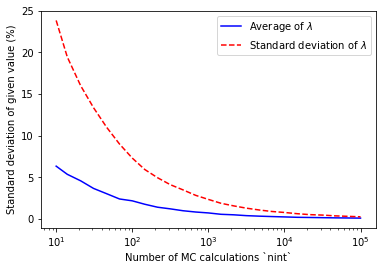

In [8]:
# plot the two lines in different colors and styles
plt.semilogx(nintrange, avgstd, '-', color='b', label='Average of $\lambda$')
plt.semilogx(nintrange, stdstd, '--', color='r', label='Standard deviation of $\lambda$')

# make the axes labels
plt.xlabel('Number of MC calculations `nint`')
plt.ylabel('Standard deviation of given value (%)')

# print the label in the upper right corner (the one with no lines hopefully)
plt.legend(loc='upper right')

The plot clearly shows that at `nint=10000`, the uncertainty is well enough converged. So we got lucky in the first place.

## Exercise 3

However, we still don't know if nconv was actually a good value or not. So let's simply do the same for nconv as we did for nint, at an nint of 10000. Actually, even `nint=1000` looks like it would be an acceptable value, but since we have the computational power, it is better to not take it as close to the limit. Let's limit nconv at 10000 for the first try, in order to not make the number of calculations blow up.

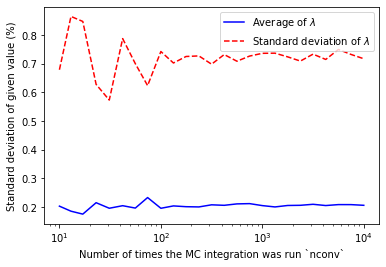

In [9]:
# set nint
nint = 10000
nconvrange = np.logspace(1, 4, 25)
# transform nconvrange to an integer again
nconvrange = np.array(nconvrange, dtype=int)

# define empty arrays to save stuff in 
avgstd = np.zeros(len(nconvrange))
stdstd = np.zeros(len(nconvrange))

# get the average and standard deviation based on nconv
for it in range(len(nconvrange)):
    nconv = nconvrange[it]
    avgstd[it], stdstd[it] = mcconv(nconv, nint)
    
# plot the two lines in different colors and styles
plt.semilogx(nconvrange, avgstd, '-', color='b', label='Average of $\lambda$')
plt.semilogx(nconvrange, stdstd, '--', color='r', label='Standard deviation of $\lambda$')

# make the axes labels
plt.xlabel('Number of times the MC integration was run `nconv`')
plt.ylabel('Standard deviation of given value (%)')

# print the label in the upper right corner (the one with no lines hopefully)
plt.legend(loc='upper right')

Clearly, the calculation has well converged at an nconv of 1000, since all the fluctuations in the standard deviations are gone. We don't expect this curve to asymptotically fall towards zeros deviation (which is what we expected in exercise 2). The absolute uncertainty is simply defined by nint. However, we do expect large fluctuations for cases in which nconv is not large enough, this can clearly be seen between 10 and 100.